In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import linear_model

In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df=pd.read_csv("Housing.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
dummies=pd.get_dummies(df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']],drop_first=True)
dummies

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0
3,1,0,1,0,1,1,0,0
4,1,1,1,0,1,0,0,0
5,1,0,1,0,1,1,1,0
6,1,0,0,0,1,1,1,0
7,1,0,0,0,0,0,0,1
8,1,1,1,0,1,1,0,0
9,1,1,0,0,1,1,0,1


In [9]:
df2=pd.concat([df,dummies],axis=1)
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0,0,0


In [10]:
df2=df2.drop(columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1)
df2

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
5,10850000,7500,3,3,1,2,1,0,1,0,1,1,1,0
6,10150000,8580,4,3,4,2,1,0,0,0,1,1,1,0
7,10150000,16200,5,3,2,0,1,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1


In [11]:
df2.shape

(545, 14)

In [12]:
cor1=df.corr()
cor1

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [13]:
correlated_features=set()
for i in range(len(cor1.columns)):
    for j in range(i):
        if abs(cor1.iloc[i,j])>0.42:
            colname1=cor1.columns[i]
            colname2=cor1.columns[j]
            print(abs(cor1.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)
        

0.5359973457780797 -- 1 -- 0 -- area -- price
0.517545339455012 -- 3 -- 0 -- bathrooms -- price
0.42071236618861724 -- 4 -- 0 -- stories -- price


In [14]:
print(correlated_features)

{'price', 'bathrooms', 'area', 'stories'}


In [15]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df2,test_size=0.3,random_state=2)

In [16]:
df_train.head()#y=m1x1+m2x2+m3x3+m4x4+m5x5+m6x6+c

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
166,5320000,7800,3,1,1,2,1,0,1,0,1,1,0,1
378,3640000,2275,3,1,3,0,1,0,0,1,1,1,1,0
349,3780000,4820,3,1,2,0,1,0,0,0,0,0,1,0
368,3675000,5640,2,1,1,0,0,0,0,0,0,0,1,0
306,4165000,4840,3,1,2,1,1,0,0,0,0,0,1,0


In [17]:
df_train.shape

(381, 14)

In [18]:
df_train.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['price','area','bathrooms','stories','bedrooms','parking']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train[num_vars]

,price,area,bathrooms,stories,bedrooms,parking
166,0.309091,0.440860,0.0,0.000000,0.4,0.666667
378,0.163636,0.044803,0.0,0.666667,0.4,0.000000
349,0.175758,0.227240,0.0,0.333333,0.4,0.000000
368,0.166667,0.286022,0.0,0.000000,0.2,0.000000
306,0.209091,0.228674,0.0,0.333333,0.4,0.333333
54,0.484848,0.311828,0.5,0.333333,0.4,0.333333
276,0.221212,0.197133,0.0,0.000000,0.2,0.333333
114,0.369697,0.369176,0.0,0.000000,0.2,0.666667
495,0.084848,0.168459,0.0,0.333333,0.4,0.333333
354,0.175758,0.483871,0.0,0.000000,0.2,0.333333


In [20]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
166,0.309091,0.440860,0.4,0.0,0.000000,0.666667,1,0,1,0,1,1,0,1
378,0.163636,0.044803,0.4,0.0,0.666667,0.000000,1,0,0,1,1,1,1,0
349,0.175758,0.227240,0.4,0.0,0.333333,0.000000,1,0,0,0,0,0,1,0
368,0.166667,0.286022,0.2,0.0,0.000000,0.000000,0,0,0,0,0,0,1,0
306,0.209091,0.228674,0.4,0.0,0.333333,0.333333,1,0,0,0,0,0,1,0


In [21]:
y_train=df_train.pop('price')#X_train=df_train.drop(coumns=['price'],axis=1)
X_train=df_train  #

In [22]:
y_train.head()

166    0.309091
378    0.163636
349    0.175758
368    0.166667
306    0.209091
Name: price, dtype: float64

In [23]:
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
def build_model(X,Y):     
    X=sm.add_constant(X)
    lm=sm.OLS(Y,X).fit()  #ORDINARY LEAST SQUARE
    print(lm.summary())
    return lm
    
    

In [25]:
#X_train.head()

In [26]:
model1=build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     63.38
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           2.23e-85
Time:                        08:00:28   Log-Likelihood:                 382.06
No. Observations:                 381   AIC:                            -736.1
Df Residuals:                     367   BIC:                            -680.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [27]:
X_train.values

array([[0.44086022, 0.4       , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.04480287, 0.4       , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.22724014, 0.4       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.1655914 , 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01333333, 0.2       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.18709677, 0.6       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
X_train.shape[1]

13

In [29]:
def CheckVIf(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return(vif)


In [30]:
CV=CheckVIf(X_train)
CV

,Features,VIF
1,bedrooms,7.78
5,mainroad_yes,5.87
0,area,5.18
3,stories,2.84
11,furnishingstatus_semi-furnished,2.33
7,basement_yes,2.24
4,parking,1.99
12,furnishingstatus_unfurnished,1.88
9,airconditioning_yes,1.86
2,bathrooms,1.70


In [35]:
X_train1=X_train.drop(['bedrooms'],axis=1)

In [36]:
X_train1.head()

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
166,0.440860,0.0,0.000000,0.666667,1,0,1,0,1,1,0,1
378,0.044803,0.0,0.666667,0.000000,1,0,0,1,1,1,1,0
349,0.227240,0.0,0.333333,0.000000,1,0,0,0,0,0,1,0
368,0.286022,0.0,0.000000,0.000000,0,0,0,0,0,0,1,0
306,0.228674,0.0,0.333333,0.333333,1,0,0,0,0,0,1,0


In [37]:
model2=build_model(X_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     68.67
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           3.66e-86
Time:                        08:03:27   Log-Likelihood:                 381.71
No. Observations:                 381   AIC:                            -737.4
Df Residuals:                     368   BIC:                            -686.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [38]:
CV1=CheckVIf(X_train1)
CV1

,Features,VIF
4,mainroad_yes,5.46
0,area,4.99
2,stories,2.40
6,basement_yes,2.06
10,furnishingstatus_semi-furnished,2.04
3,parking,1.96
8,airconditioning_yes,1.85
1,bathrooms,1.68
11,furnishingstatus_unfurnished,1.66
5,guestroom_yes,1.59


In [43]:
X_train2=X_train1.drop(['furnishingstatus_semi-furnished'],axis=1)

In [44]:
X_train2.head()

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
166,0.440860,0.0,0.000000,0.666667,1,0,1,0,1,1,1
378,0.044803,0.0,0.666667,0.000000,1,0,0,1,1,1,0
349,0.227240,0.0,0.333333,0.000000,1,0,0,0,0,0,0
368,0.286022,0.0,0.000000,0.000000,0,0,0,0,0,0,0
306,0.228674,0.0,0.333333,0.333333,1,0,0,0,0,0,0


In [45]:
model3=build_model(X_train2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     74.95
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           5.48e-87
Time:                        08:07:21   Log-Likelihood:                 381.42
No. Observations:                 381   AIC:                            -738.8
Df Residuals:                     369   BIC:                            -691.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
X_train.ndim

2

In [48]:
y_train.ndim

1

In [54]:
lm=LinearRegression()
lm.fit(X_train2,y_train)
rfe=RFE(lm)
rfe=rfe.fit(X_train2,y_train)

In [55]:
X_train2.columns[rfe.support_]

Index(['area', 'bathrooms', 'stories', 'parking', 'airconditioning_yes'], dtype='object')

In [56]:
X_train_rfe=X_train[X_train2.columns[rfe.support_]]

In [57]:
X_train_rfe.head()

,area,bathrooms,stories,parking,airconditioning_yes
166,0.440860,0.0,0.000000,0.666667,1
378,0.044803,0.0,0.666667,0.000000,1
349,0.227240,0.0,0.333333,0.000000,0
368,0.286022,0.0,0.000000,0.000000,0
306,0.228674,0.0,0.333333,0.333333,0


In [58]:
model4=build_model(X_train_rfe,y_train)
model4

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.73e-74
Time:                        08:10:42   Log-Likelihood:                 337.32
No. Observations:                 381   AIC:                            -662.6
Df Residuals:                     375   BIC:                            -639.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0625    

In [59]:
X_train_rfe = sm.add_constant(X_train_rfe) # Adding the constant
X_train_rfe.head()

,const,area,bathrooms,stories,parking,airconditioning_yes
166,1.0,0.440860,0.0,0.000000,0.666667,1
378,1.0,0.044803,0.0,0.666667,0.000000,1
349,1.0,0.227240,0.0,0.333333,0.000000,0
368,1.0,0.286022,0.0,0.000000,0.000000,0
306,1.0,0.228674,0.0,0.333333,0.333333,0


In [61]:
Y_train_pred = model4.predict(X_train_rfe)
Y_train_pred.head()

166    0.372816
378    0.233329
349    0.180654
368    0.168458
306    0.211519
dtype: float64

In [62]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
333,3920000,3000,3,1,2,0,1,0,0,0,0,0,1,0
84,6510000,3760,3,1,2,2,1,0,0,1,0,0,1,0
439,3255000,3930,2,1,1,0,0,0,0,0,0,0,0,1
396,3500000,3640,2,1,1,1,1,0,0,0,0,0,1,0
161,5460000,6100,3,1,3,0,1,1,0,0,1,1,1,0


In [63]:
num_vars=['price','area','bathrooms','stories']
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

In [64]:
Y_test=df_test.pop('price')
X_test=df_test

In [65]:
Y_test.head()

333    0.206667
84     0.453333
439    0.143333
396    0.166667
161    0.353333
Name: price, dtype: float64

In [66]:
X_test.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
333,0.089655,3,0.0,0.333333,0,1,0,0,0,0,0,1,0
84,0.142069,3,0.0,0.333333,2,1,0,0,1,0,0,1,0
439,0.153793,2,0.0,0.000000,0,0,0,0,0,0,0,0,1
396,0.133793,2,0.0,0.000000,1,1,0,0,0,0,0,1,0
161,0.303448,3,0.0,0.666667,0,1,1,0,0,1,1,1,0


In [67]:
X_test_n=pd.DataFrame(sm.add_constant(X_test))

In [68]:
X_test_n.head()

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
333,1.0,0.089655,3,0.0,0.333333,0,1,0,0,0,0,0,1,0
84,1.0,0.142069,3,0.0,0.333333,2,1,0,0,1,0,0,1,0
439,1.0,0.153793,2,0.0,0.000000,0,0,0,0,0,0,0,0,1
396,1.0,0.133793,2,0.0,0.000000,1,1,0,0,0,0,0,1,0
161,1.0,0.303448,3,0.0,0.666667,0,1,1,0,0,1,1,1,0


In [69]:
X_test_n.shape

(164, 14)

In [85]:
Y_pred=model1.predict(X_test_n)
Y_pred

333    0.212630
84     0.447702
439    0.100702
396    0.231412
161    0.478116
399    0.303607
130    0.240081
347    0.185044
425    0.340144
393    0.199310
280    0.213002
394    0.203085
352    0.313931
188    0.338183
55     0.391434
141    0.565847
77     0.520808
464    0.357188
518    0.150166
240    0.360386
167    0.460710
413    0.304710
179    0.420525
155    0.540391
506    0.080854
543    0.155151
414    0.130501
256    0.389972
403    0.334385
522    0.211699
335    0.432946
286    0.271530
265    0.267407
146    0.364905
108    0.359569
65     0.580956
500    0.136987
67     0.436731
183    0.403595
470    0.153619
129    0.620321
513    0.205477
358    0.211113
294    0.290842
478    0.236549
371    0.257724
409    0.262460
214    0.170536
200    0.356733
332    0.356069
1      0.914023
178    0.524651
516    0.191746
435    0.130501
476    0.341993
152    0.531659
18     0.568138
230    0.285829
532    0.082605
331    0.610323
457    0.193744
369    0.165621
309    0

In [86]:
Y_pred.shape

(164,)

In [87]:
from sklearn.metrics import r2_score 
print("Test Prediction R-Sqrd: ", r2_score(Y_test,Y_pred))

Test Prediction R-Sqrd:  0.4702504542060544


In [73]:
print("Train Prediction R-Sqrd: ", r2_score(y_train, Y_train_pred))

Train Prediction R-Sqrd:  0.6102695918767078


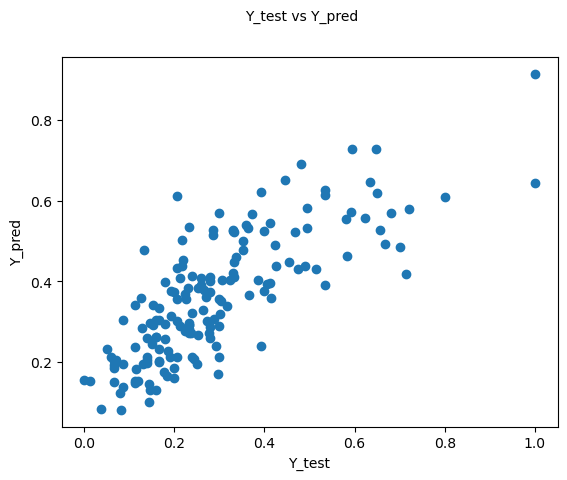

In [74]:
fig = plt.figure()
plt.scatter(Y_test, Y_pred)
fig.suptitle('Y_test vs Y_pred', fontsize = 10)              
plt.xlabel('Y_test', fontsize = 10)                          
plt.ylabel('Y_pred', fontsize = 10)
plt.show()

In [88]:
score = r2_score(Y_test, Y_pred)
score

0.4702504542060544